In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!


In [17]:
symbol ="GC=F"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-11-01",end="2021-02-06")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-11-02,18568.0,1872.900024,1894.699951,1872.900024,1890.400024
2020-11-03,18569.0,1891.500000,1908.500000,1891.500000,1908.500000
2020-11-04,18570.0,1893.800049,1907.000000,1885.300049,1894.599976
2020-11-05,18571.0,1901.699951,1948.000000,1901.699951,1945.300049
2020-11-06,18572.0,1940.800049,1958.800049,1940.800049,1950.300049
...,...,...,...,...,...
2021-02-01,18659.0,1866.599976,1871.900024,1850.000000,1860.800049
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951


In [18]:
data_frames_separate[0]['12EMA'] = talib.EMA(data_frames_separate[0]['Close'], timeperiod = 12)
data_frames_separate[0]['26EMA'] = talib.EMA(data_frames_separate[0]['Close'], timeperiod = 26)

data_frames_separate[0]

,Date,Open,High,Low,Close,12EMA,26EMA
Date,,,,,,,
2020-11-02,18568.0,1872.900024,1894.699951,1872.900024,1890.400024,NaN,NaN
2020-11-03,18569.0,1891.500000,1908.500000,1891.500000,1908.500000,NaN,NaN
2020-11-04,18570.0,1893.800049,1907.000000,1885.300049,1894.599976,NaN,NaN
2020-11-05,18571.0,1901.699951,1948.000000,1901.699951,1945.300049,NaN,NaN
2020-11-06,18572.0,1940.800049,1958.800049,1940.800049,1950.300049,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-01,18659.0,1866.599976,1871.900024,1850.000000,1860.800049,1853.798696,1859.956451
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000,1850.214281,1857.774492
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951,1847.442846,1855.880081


In [19]:
Macd12_data= talib.EMA(data_frames_separate[0]['Close'], timeperiod = 12)
Macd26_data= talib.EMA(data_frames_separate[0]['Close'], timeperiod = 26)

macd = Macd12_data - Macd26_data
exp3 = macd.ewm(span=9, adjust=False).mean() # not sure what this is !

# Macd12_data= data_frames_separate[0]["12EMA"]
# Macd26_data= data_frames_separate[0]["26EMA"]
exp3

Date
2020-11-02         NaN
2020-11-03         NaN
2020-11-04         NaN
2020-11-05         NaN
2020-11-06         NaN
                ...   
2021-02-01   -5.587933
2021-02-02   -5.982389
2021-02-03   -6.473358
2021-02-04   -7.675154
2021-02-05   -8.890992
Length: 64, dtype: float64

In [20]:
# fig,plt= plt.subplots(figsize=(12,10))
# plt.plot(data.index,Macd12_data)
# plt.plot(data.index,Macd26_data)

In [21]:
# data_frames_separate[0][['Close','12EMA','26EMA']].plot(figsize=(12,10))

# plt.show()

In [22]:
def plotMACD(num):
    
          fig = plt.figure(figsize=(12,8))
          gs = gridspec.GridSpec(2, 1, height_ratios = [2,1]) 
          ax_stock= plt.subplot(gs[0])    
          plt.title(num_name[num])

          candlestick_ohlc(ax_stock,data_frames_separate[num].values,width=0.6, \
                            colorup='green', colordown='red', alpha=0.8)
    #       ax_stock.plot(data.index,data_frames_separate[0]["Close"])

          ax_MACD= plt.subplot(gs[1])


#           ax_MACD.plot(range(len(data_frames_separate[0]),Macd12_data)
#           ax_MACD.plot(range(len(data_frames_separate[0]),Macd26_data)
          ax_MACD.plot(data.index,Macd12_data)
          ax_MACD.plot(data.index,Macd26_data)
          ax_MACD.plot(data.index, exp3, label='Signal Line', color='#E5A4CB')


  

  #legend_labels= ["overbought", "oversold","rsi"]
  #ax_MACD.legend(legend_labels,loc = 2)

          date_format = mpl_dates.DateFormatter('%d %b %Y')
          ax_MACD.xaxis.set_major_formatter(date_format)
          fig.autofmt_xdate()
          fig.tight_layout()
          ax_stock.grid()
          #ax_rsi.grid()
        # Removing the date labels and ticks from the price subplot:
          ax_stock.get_xaxis().set_visible(False)
        # Removing the gap between the plots:
          fig.subplots_adjust(hspace=0)
        # Adding a horizontal line at the zero level in the ROC subplot:
          ax_MACD.axhline(20, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
        # We can add labels to both vertical axis:
          ax_stock.set_ylabel("Price ($)")
          ax_MACD.set_ylabel("MACD")


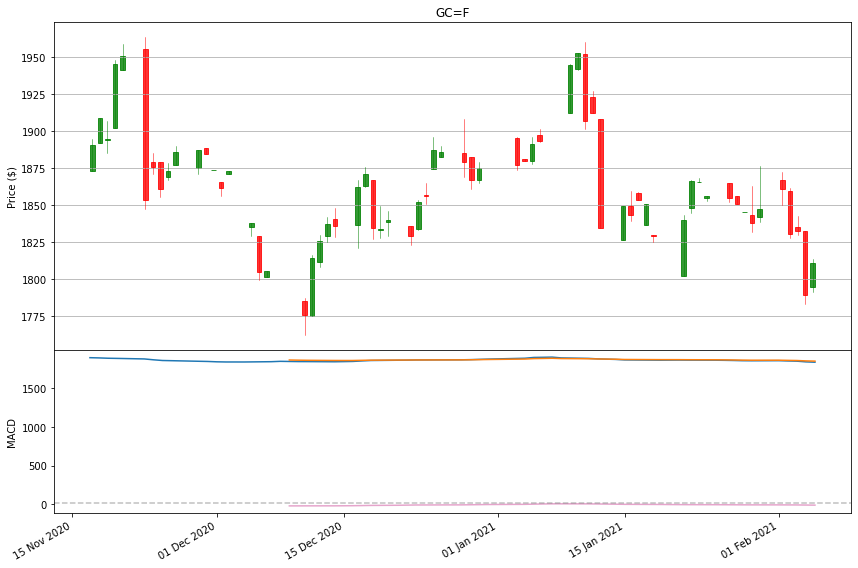

In [23]:
plotMACD(0)